In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training set: (1765, 28, 28, 1), Labels: (1765, 10)
Testing set: (2988, 28, 28, 1), Labels: (2988, 10)


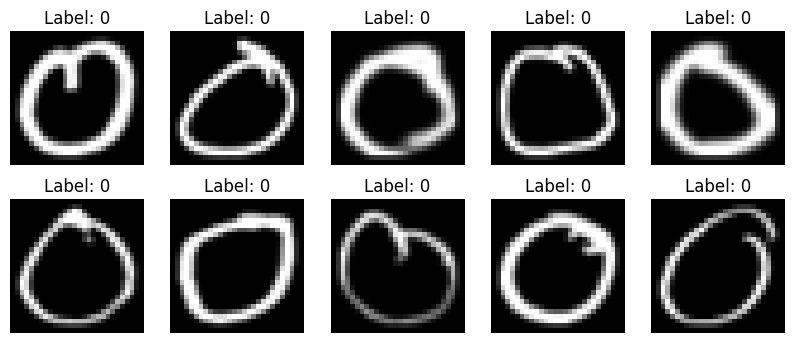

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import glob  # Better file searching

# Define dataset paths
dataset_dir = "/content/drive/MyDrive/Copy of devnagari digit/DevanagariHandwrittenDigitDataset"
train_dir = os.path.join(dataset_dir, "Train")
test_dir = os.path.join(dataset_dir, "Test")

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted([d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))])  # Only directories
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for img_path in glob.glob(os.path.join(class_path, "*.png")):  # Adjust extension if needed
            try:
                img = Image.open(img_path).convert("L")  # Convert to grayscale
                img = img.resize((img_width, img_height))  # Resize to (28,28)
                img = np.array(img).astype(np.float32) / 255.0  # Normalize pixel values

                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train, x_test = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0

# Reshape images to (28, 28, 1) for CNN input
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [7]:
import tensorflow as tf
from tensorflow import keras

# Define model parameters
num_classes = 10
input_shape = (28, 28, 1)

def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)

    # Flatten layer
    x = keras.layers.Flatten()(inputs)

    # Hidden layers with ReLU and Batch Normalization
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dense(64, activation="relu")(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name="Functional_DNN")

    return model

# Build the model
functional_model = build_functional_model()
functional_model.summary()


Model: "Functional_DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 243,530 (951.29 KB)

 Non-trainable params: 768 (3.00 KB)

In [8]:
functional_model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [9]:
batch_size = 128
epochs = 500
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = functional_model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6601 - loss: 1.1446 - val_accuracy: 0.9148 - val_loss: 0.3628
Epoch 2/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9142 - loss: 0.3209 - val_accuracy: 0.9401 - val_loss: 0.2174
Epoch 3/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9373 - loss: 0.2316 - val_accuracy: 0.9501 - val_loss: 0.1779
Epoch 4/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9491 - loss: 0.1853 - val_accuracy: 0.9563 - val_loss: 0.1543
Epoch 5/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9561 - loss: 0.1587 - val_accuracy: 0.9608 - val_loss: 0.1387
Epoch 6/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9610 - loss: 0.1410 - val_accuracy: 0.9627 - val_loss: 0.1282
Epoch 7/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9658 - loss: 0.1232 - val_accuracy: 0.9660 - val_loss: 0.1200
Epoch 8/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9693 - loss: 0.1086 - val_

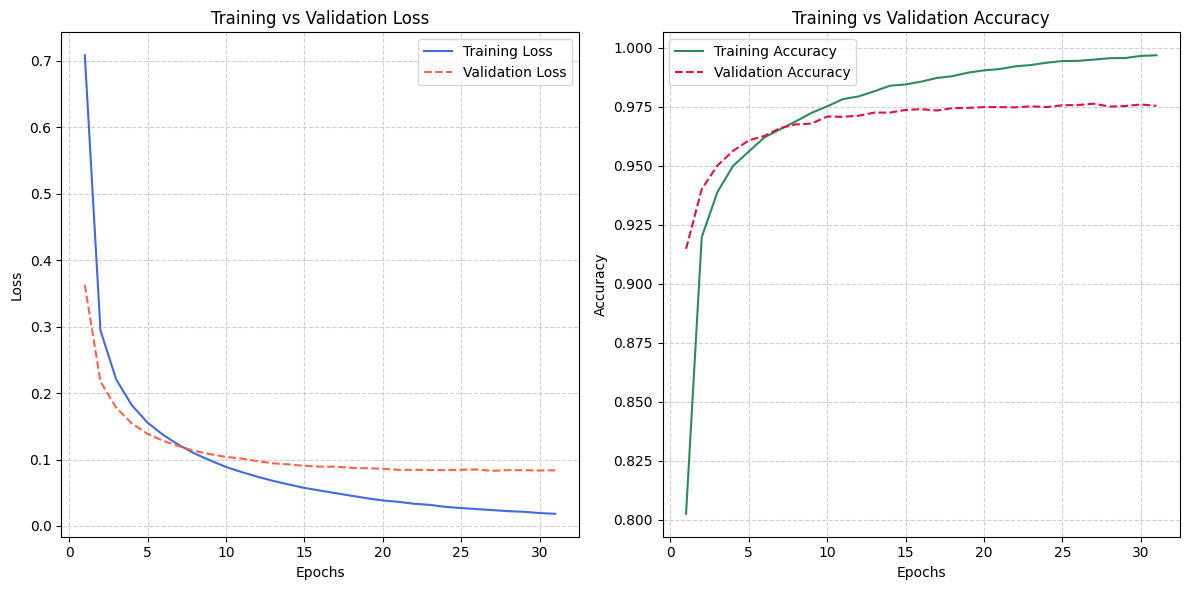

In [10]:
import matplotlib.pyplot as plt

# Extract training and validation metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='royalblue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='tomato', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='seagreen')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='crimson', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [11]:
predictions = functional_model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 7
True label for first image: 7


In [12]:
functional_model.save('mnist_fully_connected_model.h5')

In [13]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')